In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG','MSFT','F','GE']  # Procter&Gamble Microsoft Ford General Electric
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo',start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6185 entries, 1995-01-03 to 2019-07-26
Data columns (total 4 columns):
PG      6185 non-null float64
MSFT    6185 non-null float64
F       6185 non-null float64
GE      6185 non-null float64
dtypes: float64(4)
memory usage: 241.6 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.441071,2.436452,3.307851,4.087069
1995-01-04,6.389442,2.454162,3.396852,4.087069
1995-01-05,6.299082,2.413681,3.367184,4.097085
1995-01-06,6.311993,2.454162,3.367184,4.077049
1995-01-09,6.286175,2.438982,3.426519,4.036981


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2019-07-22,115.300003,138.429993,10.02,10.21
2019-07-23,113.849998,139.289993,10.17,10.65
2019-07-24,112.599998,140.720001,10.33,10.68
2019-07-25,112.769997,140.190002,9.56,10.43
2019-07-26,114.730003,141.339996,9.57,10.51


In [6]:
# Create a line chart that allow us to understand how these securities performed throughout the timeframe under consideration
mydata.iloc[0]

PG      6.441071
MSFT    2.436452
F       3.307851
GE      4.087069
Name: 1995-01-03 00:00:00, dtype: float64

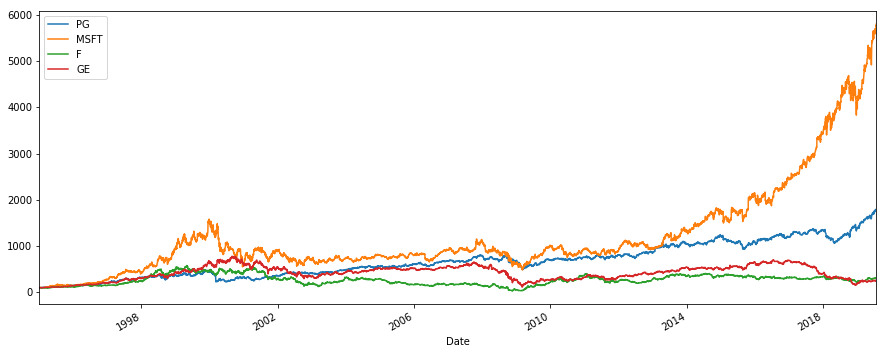

In [7]:
(mydata/mydata.iloc[0] * 100).plot(figsize = (15,6))    # normalize our data to 100 by multiplying 100 
plt.show()

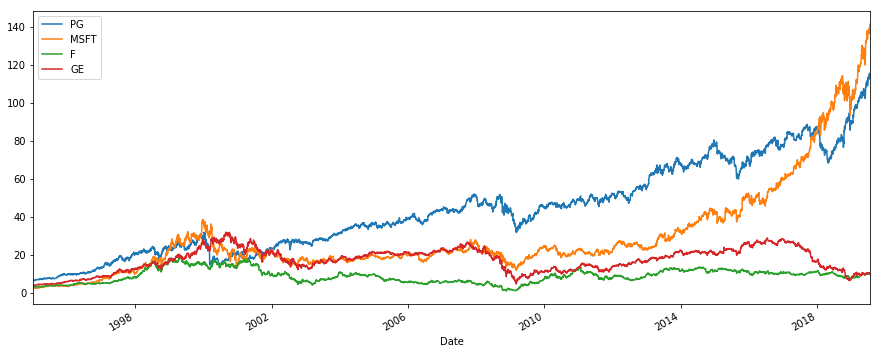

In [8]:
mydata.plot(figsize=(15,6))
plt.show()

In [9]:
# from above graphs we must say Microsoft is a fair winner. It beats the other stocks regarding stock price performance from 1995 until the end of 2007. The moment of the global financial crisis. 
# General Electric performed better than Procter and Gamble. But apparently it could not sustain the tumble.
# Procter Gamble shares have cost more ever since. Finally Ford enjoyed a short time lead over GE.

In [10]:
# Calculating the Return of A Portfolio of Securities
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002050,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [11]:
weights = np.array([0.25,0.25,0.25,0.25])

In [12]:
np.dot(returns,weights)

array([        nan,  0.00653982, -0.00923   , ...,  0.00445914,
       -0.02505124,  0.00857495])

In [13]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.141198
MSFT    0.212870
F       0.120521
GE      0.082883
dtype: float64

In [14]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5) * 100) + ' %'
print(pfolio_1)

13.937 %


In [15]:
# Another different set of weights
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [17]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

13.937 %
16.384999999999998 %
